### Lista 07
 Exercícios: 7, 8, 13, 14 e 17
 
 - Guilherme Cramer Barbosa Silva 2015102170

In [2]:
import numpy as np
import seaborn as sns 
import random 
import pandas as pd
import matplotlib.pyplot as plt

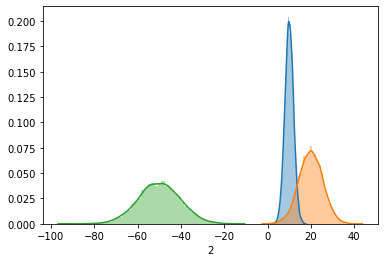

In [56]:
# Exercício 07
sigma = np.array([[4,9,-14],[9,30,-44],[-14,-44,94]])
L = np.linalg.cholesky(sigma)

n_points  = 10000
z1  = np.random.normal(0, 1, n_points)
z2  = np.random.normal(0, 1, n_points)
z3  = np.random.normal(0, 1, n_points)

Z = np.array([z1,z2,z3]).reshape(n_points,3)
mu = np.array([10,20,-50])
X = [x + mu for x in np.dot(L,Z.T).T]
dfX = pd.DataFrame(X)
sns.distplot(dfX[0])
sns.distplot(dfX[1])
sns.distplot(dfX[2])


In [64]:
print('Média: ',np.mean(X,axis = 0))
print('Mu: ', mu)

covMatriz = np.cov(dfX,bias = True)

Média:  [  9.99523017  20.00177344 -50.01614194]
Mu:  [ 10  20 -50]


In [91]:
sigma_hat = np.zeros([3,3])
for i in range(3):
    for j in range(i):
        m1 = np.mean(dfX[i])
        m2 = np.mean(dfX[j])
        sigma_hat[i,j] = np.dot(dfX[i] - m1,dfX[j] - m2)/n_points
    sigma_hat[i,i] = np.mean((dfX[i] -np.mean(dfX[i]))**2 )
        
        
print('Matriz sigma calculada: \n',sigma_hat)        

Matriz sigma calculada: 
 [[  3.94912778   0.           0.        ]
 [  8.93071873  29.92468681   0.        ]
 [-13.84301636 -43.65775284  93.55531539]]


##### questao 8:
Como os dados não foram passados especimicamente, vamos reaproveitar os dados da questão anterior (7).


In [109]:
R = np.zeros([3,3])
ro = np.zeros([3,3])
for i in range(3):
    for j in range(i):
        R[i,j] = sigma_hat[i,j]/np.sqrt(sigma_hat[i,i]*sigma_hat[j,j])
        ro[i,j] = np.cov(dfX[i],dfX[j])[0,1]/np.sqrt(sigma[i,i]*sigma[j,j])
    ro[i,i] = 1
    
print('Matriz R:\n')
print(R)
print('\nMatriz ro: \n')
print(ro)

Matriz R:

[[ 0.          0.          0.        ]
 [ 0.82152543  0.          0.        ]
 [-0.72018804 -0.82511092  0.        ]]

Matriz ro: 

[[ 1.          0.          0.        ]
 [ 0.81534088  1.          0.        ]
 [-0.71397046 -0.82220527  1.        ]]


##### questao 13


In [156]:
samples = 1000
a,b,c,d = 2,3,4,5
x_values = np.linspace(a,b,samples)
y_values = np.linspace(c,d,samples)
A = (b-a)*(d-c)
p = 1/A

X = np.random.uniform(a,b,samples)
Y = np.random.uniform(c,d,samples)
Fxy = [X,Y]

# calcular distribuições marginais :
Fx_hat =[]
count = 0
for i in range(len(X)):
    for y in Y:
        count = count + y*p
    Fx_hat.append(count/len(Y))
    count = 0
    
Fy_hat =[]
count = 0
for i in range(len(Y)):
    for x in x_values:
        count = count + x*p
    Fy_hat.append(count/len(X))
    count = 0
    
# Desnsidade conjunta atraves das marginais
freq_scale = len(X)*len(Y)
Fxy_hat = []
for x in Fx_hat:
    for y in Fy_hat:
        pxy = x*y
        Fxy_hat.append(pxy/freq_scale)
print('Teste distribuição uniforme: \n')
print(kstest(Fxy_hat, "uniform"))

Teste distribuição uniforme: 

KstestResult(statistic=0.999988740644403, pvalue=0.0)


#### Questao 14


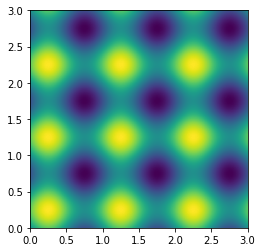

In [170]:
n_samples = 300
x_values = np.linspace(0,3,1000)
y_values = np.linspace(0,3,1000)
g =np.ones([len(x_values),len(y_values)])*1/9
Fxy = np.zeros([len(x_values),len(y_values)])
i,j = 0,0
for x in x_values:
    for y in y_values:
        Fxy[i,j] = 0.1*(2 + np.sin(2*np.pi*x) + np.sin(2*np.pi*y))
        j = j +1
    i = i+1
    j =0

# gerar a ditribuicao p : 
M = 3.6
i,j = 0,0
p = np.zeros([len(x_values),len(y_values)])
for x in x_values:
    for y in y_values:
        p[i,j] = Fxy[i,j]/(M*g[i,j])
        j = j +1
    i = i+1
    j =0

heatmap, xedges, yedges = np.histogram2d(x_values, y_values, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(Fxy, extent=extent, origin='lower')
plt.show()